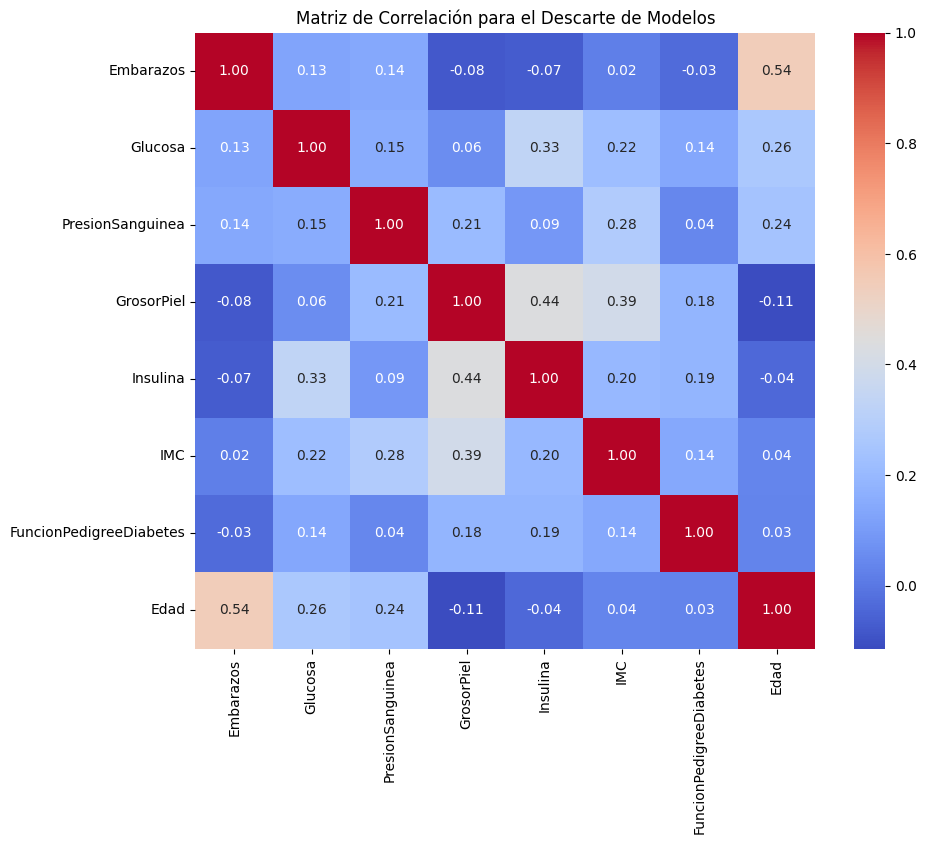

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fija la semilla para asegurar la reproducibilidad de los resultados aleatorios.
SEED = 42
np.random.seed(SEED)

# Cargar el dataset (Pima Indians Diabetes)
url_pima = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
columnas = ['Embarazos', 'Glucosa', 'PresionSanguinea', 'GrosorPiel', 'Insulina', 'IMC', 'FuncionPedigreeDiabetes', 'Edad', 'Resultado']
df_pima = pd.read_csv(url_pima, names=columnas)

# Variables
X = df_pima.drop('Resultado', axis=1)
y = df_pima['Resultado']

# Matriz de Correlación
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para el Descarte de Modelos')
plt.show() # 


In [2]:
# Dividir y Escalar datos para Modelos 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
def evaluar_modelo(modelo, X_tr, X_ts, y_ts):
    """Entrena y evalúa un modelo y devuelve la precisión."""
    modelo.fit(X_tr, y_train)
    pred = modelo.predict(X_ts)
    return accuracy_score(y_ts, pred)

resultados = {}

# 1. Naïve Bayes (Modelo con suposición violada)
nb_model = GaussianNB()
resultados['Naïve Bayes (NB)'] = evaluar_modelo(nb_model, X_train, X_test, y_test)

# 2. KNN CON Escalar (Modelo Ajustado)
knn_scaled_model = KNeighborsClassifier(n_neighbors=5)
resultados['KNN CON Escalar'] = evaluar_modelo(knn_scaled_model, X_train_scaled, X_test_scaled, y_test)

# 3. Regresión Logística (Modelo lineal robusto a correlación)
log_model = LogisticRegression(solver='liblinear', random_state=SEED)
resultados['Regresión Logística'] = evaluar_modelo(log_model, X_train_scaled, X_test_scaled, y_test) 
# Logística se beneficia del escalado para la optimización

# 4. Árbol de Decisión (Modelo no paramétrico, insensible a escala)
tree_model = DecisionTreeClassifier(random_state=SEED)
resultados['Árbol de Decisión'] = evaluar_modelo(tree_model, X_train, X_test, y_test) 

# Mostrar resultados
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Modelo', 'Precisión'])
df_resultados = df_resultados.sort_values(by='Precisión', ascending=False)
print("\n--- Precisión de los Modelos ---")
print(df_resultados.set_index('Modelo'))


--- Precisión de los Modelos ---
                     Precisión
Modelo                        
Naïve Bayes (NB)      0.744589
Regresión Logística   0.735931
KNN CON Escalar       0.701299
Árbol de Decisión     0.701299
